In [1]:
# import the necessary packages
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from IPython.display import Image

import numpy as np

# available models in Keras
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception, # TensorFlow ONLY
    "resnet": ResNet50
}

def load_model(model):
    # check that the model is valid
    if model not in MODELS.keys():
        raise AssertionError("Invalid model {}".format(model))

    # initialize the input image shape (224x224 pixels) along with
    # the pre-processing function (this might need to be changed
    # based on which model we use to classify our image)
    inputShape = (224, 224)
    preprocess = imagenet_utils.preprocess_input

    # if we are using the InceptionV3 or Xception networks, then we
    # need to set the input shape to (299x299) [rather than (224x224)]
    # and use a different image processing function
    if model in ("inception", "xception"):
        inputShape = (299, 299)
        preprocess = preprocess_input

    # load our the network weights from disk
    print("Loading model {}".format(model))
    Network = MODELS[model]
    model = Network(weights="imagenet")
    return model,inputShape,preprocess

def classify_image(image_path):
    # load the input image using the Keras helper utility while ensuring
    # the image is resized to `inputShape`, the required input dimensions
    # for the ImageNet pre-trained network
    print("Loading and pre-processing image '{}'".format(image_path))
    image = load_img(image_path, target_size=inputShape)
    image = img_to_array(image)

    # our input image is now represented as a NumPy array of shape
    # (inputShape[0], inputShape[1], 3) however we need to expand the
    # dimension by making the shape (1, inputShape[0], inputShape[1], 3)
    # so we can pass it through thenetwork
    image = np.expand_dims(image, axis=0)

    # pre-process the image using the appropriate function based on the
    # model that has been loaded (i.e., mean subtraction, scaling, etc.)
    image = preprocess(image)

    # classify the image
    print("Classifying image with model '{}'".format(model.name))
    preds = model.predict(image)
    P = imagenet_utils.decode_predictions(preds)

    # loop over the predictions and display the rank-5 predictions +
    # probabilities to our terminal
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

model,inputShape,preprocess = load_model("vgg19")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


Loading model vgg19


Loading and pre-processing image 'images/soccer_ball.jpg'
Classifying image with model 'vgg19'
1. soccer_ball: 98.14%
2. rugby_ball: 1.16%
3. golf_ball: 0.42%
4. volleyball: 0.18%
5. croquet_ball: 0.04%


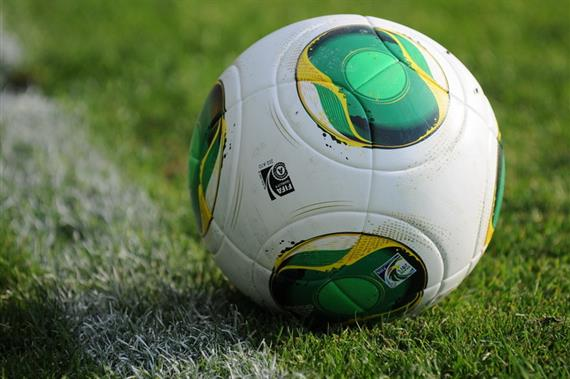

In [4]:
img = "images/soccer_ball.jpg"
classify_image(img)
Image(img)

Loading and pre-processing image 'images/beagle.jpg'
Classifying image with model 'vgg19'
1. Walker_hound: 57.61%
2. beagle: 19.27%
3. English_foxhound: 11.57%
4. basset: 10.54%
5. bloodhound: 0.34%


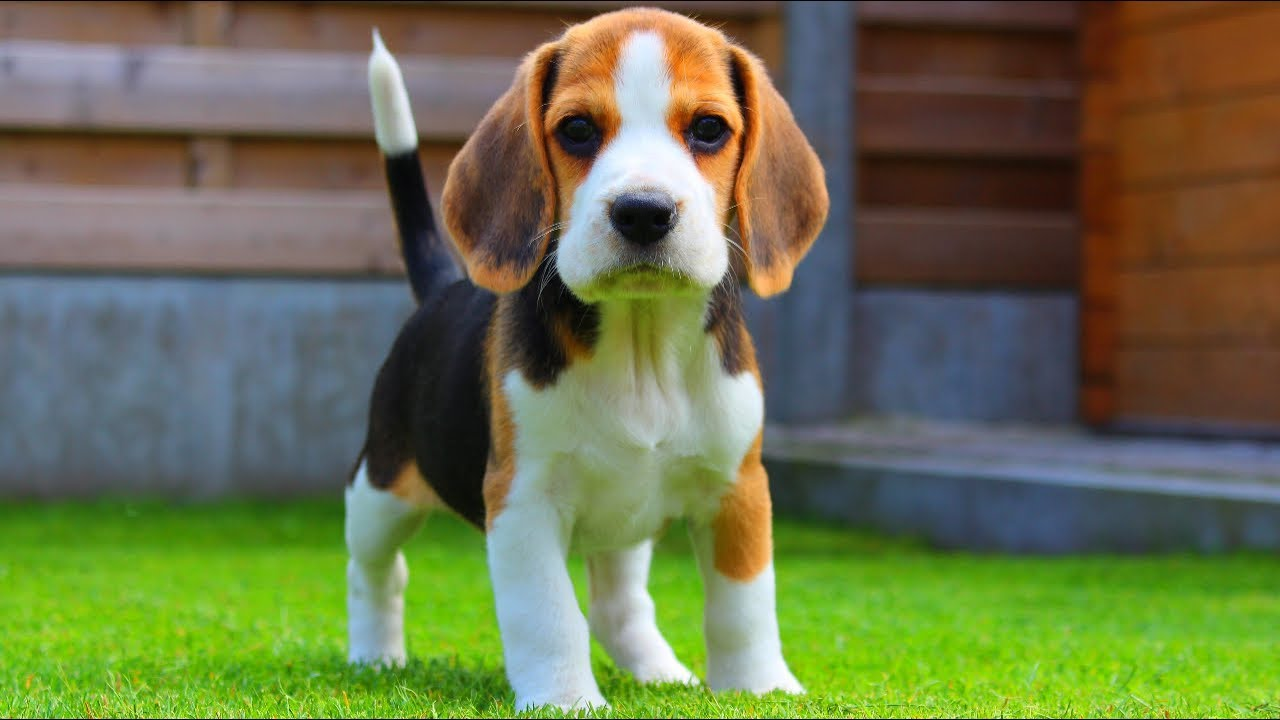

In [5]:
img = "images/beagle.jpg"
classify_image(img)
Image(img, width=800)

Loading and pre-processing image 'images/kalmar_slott.jpg'
Classifying image with model 'vgg19'
1. castle: 94.73%
2. palace: 2.54%
3. monastery: 0.79%
4. mosque: 0.65%
5. church: 0.54%


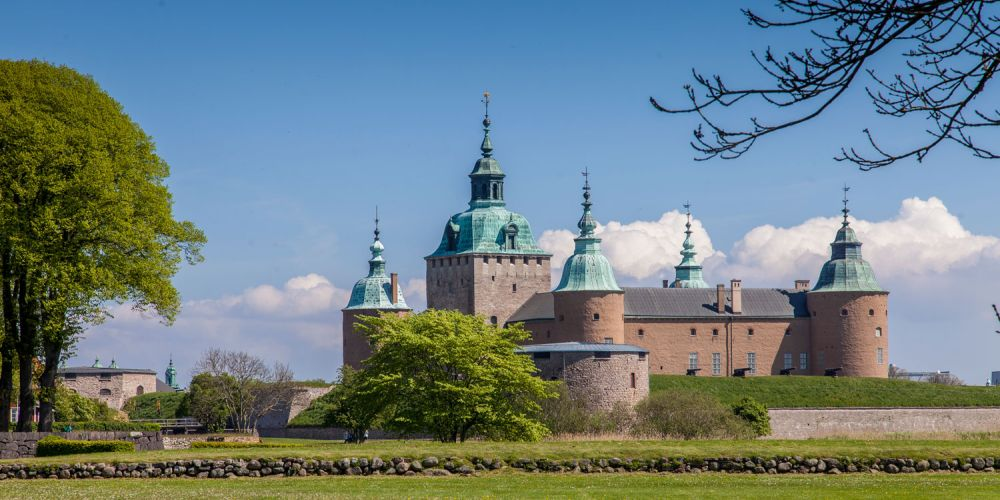

In [5]:
img = "images/kalmar_slott.jpg"
classify_image(img)
Image(img, width=800)

Loading and pre-processing image 'images/car_water.jpg'
Classifying image with model 'vgg19'
1. fireboat: 29.96%
2. submarine: 16.93%
3. trimaran: 12.29%
4. paddlewheel: 9.09%
5. lifeboat: 5.22%


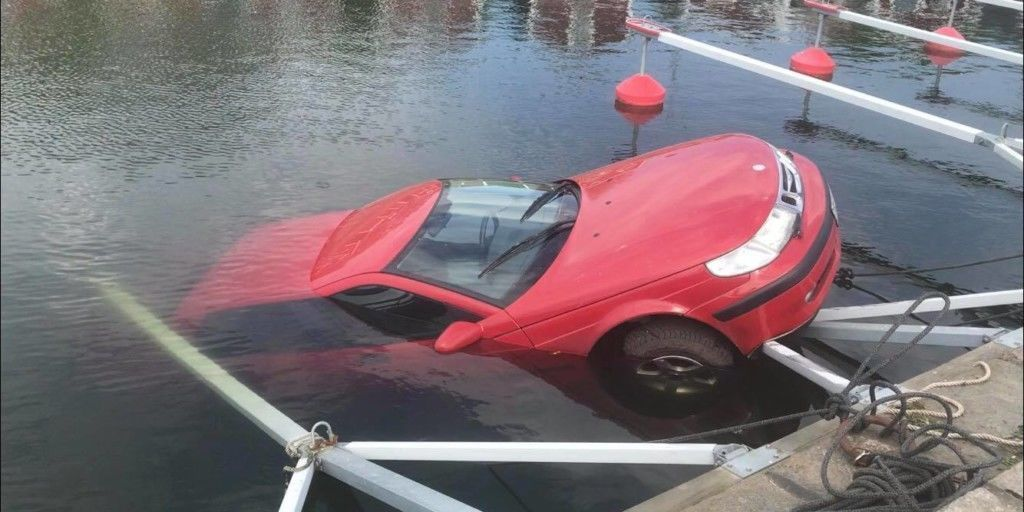

In [10]:
img = "images/car_water.jpg"
classify_image(img)
Image(img, width=800)